# K-Nearest Neighbors Classification Algorithim:  Python Class Implementation


In [ ]:
# import libraries
import requests
from contextlib import closing
import csv
import pandas as pd
from random import seed
from scipy.spatial.distance import pdist
import numpy as np
from random import randrange
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
file_name = "IRIS.csv"
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
dataframe = pd.read_csv(file_name, names=cols, skiprows=1)
dataset = pd.read_csv(file_name, names=cols, skiprows=1).drop('class', axis=1)
print(dataframe.head())
print(dataset.head())


   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [ ]:
X = dataset
y = dataframe["class"]

In [ ]:
dataframe.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataframe['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

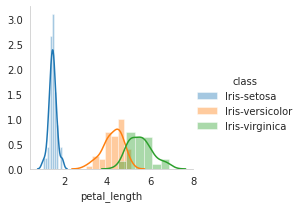

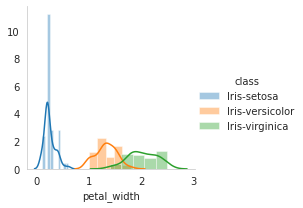

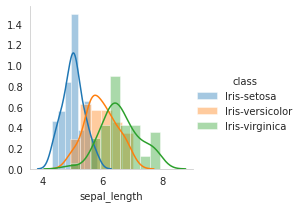

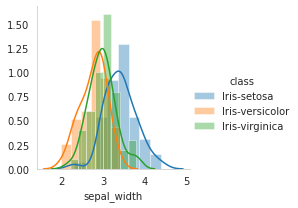

In [ ]:
# distribution plots - asses distribution as related to frequency
# set flower classification
iris_setosa=dataframe.loc[dataframe["class"]=="Iris-setosa"]
iris_virginica=dataframe.loc[dataframe["class"]=="Iris-virginica"]
iris_versicolor=dataframe.loc[dataframe["class"]=="Iris-versicolor"]

# plot the histogram of each flower
sns.set_style("whitegrid", {'axes.grid' : False})
sns.FacetGrid(dataframe,hue="class",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(dataframe,hue="class",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(dataframe,hue="class",size=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(dataframe,hue="class",size=3).map(sns.distplot,"sepal_width").add_legend()

# s = sns.FacetGrid(dataframe, col='class', row=cols)
# s.map(sns.scatterplot, "distributions", "")
plt.show()


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


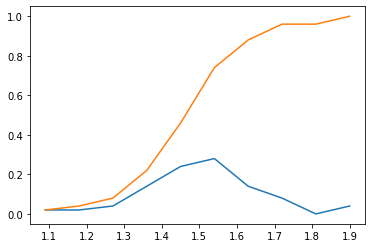

[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


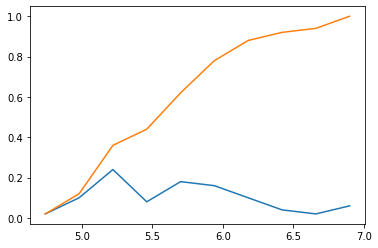

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


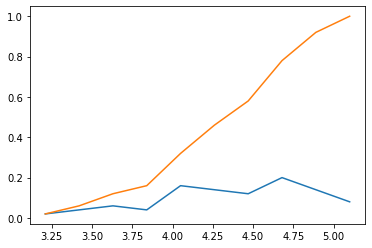

In [ ]:
# find PDF and CDF for each feathure
#for iris_setosa
counts,bin_edges=np.histogram(iris_setosa["petal_length"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#for iris_virginica
counts,bin_edges=np.histogram(iris_virginica["petal_length"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#for iris_versicolor
counts,bin_edges=np.histogram(iris_versicolor["petal_length"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()


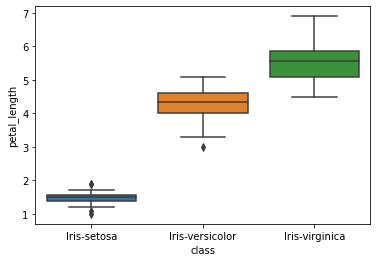

In [ ]:
sns.boxplot(x="class",y="petal_length",data=dataframe)
plt.show()


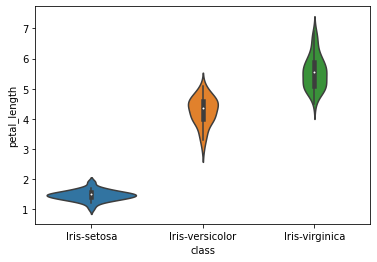

In [ ]:
sns.violinplot(x="class",y="petal_length",data=dataframe)
plt.show()

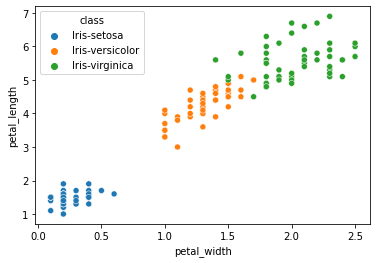

In [ ]:
sns.scatterplot(x="petal_width",y="petal_length", hue="class", data=dataframe)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


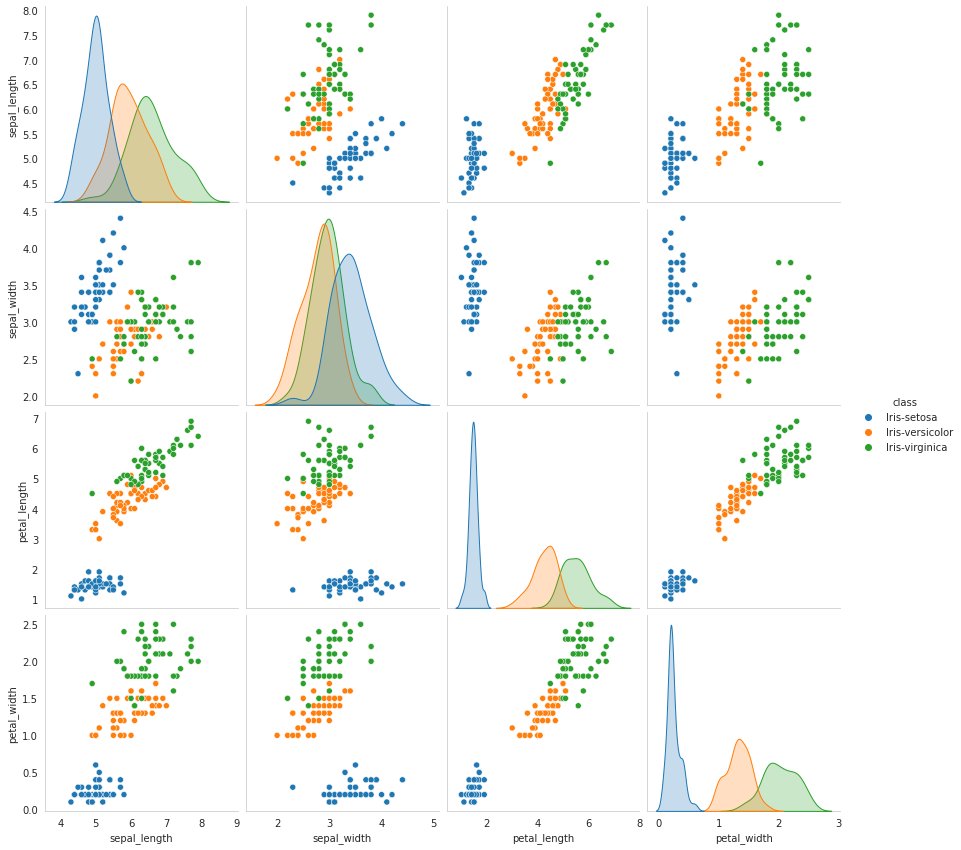

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(dataframe,hue="class",size=3);
plt.show()

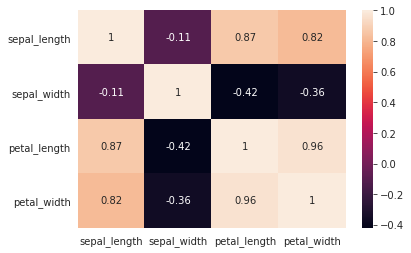

In [ ]:
sns.heatmap(dataframe.corr(), annot = True)
plt.show()


## Exploratory OOP-Based Algorithim

In [ ]:
class KNN:

    def __init__(self, X, y):
        self.random_state = 42
        self.dataframe = dataframe  # technical debt 
        self.X = dataset          # technical debt 
        self.y = dataframe['class']   # technical debt 
        self.minmax = []
        self.class_val_labels = []
        self.class_uniques = []
        self.X_train = pd.DataFrame()
        self.X_test = pd.DataFrame()
        self.distance = 0.0
        self.row1 = []
        self.row2 = []
        self.dist = []
        self.n_neighbors = 3
        self.neighbors = []
        self.pred_neigh = []
        self.pred_class = []
        self.correct = 0
        
   
    col_class = y

    # Data Wrangling
    def string_to_float(self, X):
        """
        convert string column values to floats;
        not needed -> values are floats   
        """
        pass


    def ints_to_floats(self, X):
        """
        convert integers values to floats;
        not needed -> values are floats  
        """
        pass
    
    
    def create_unique_class_id(self, dataframe):
        """
        identify unique classification values; 
        encode column values as integer labels while 
        keeping human readable format too
        """
        unique = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
        cat = pd.Categorical(['1', '2', '3'], categories=[unique])
        self.class_val_labels, self.class_uniques = pd.factorize(cat)

   
    # Pre-Processing
    def train_test_split(self, X):
       
        X_train_sz = 0.33 * len(self.X)
        copy_X = self.X.copy()
        while len(self.X_train) < X_train_sz:
          for row in copy_X:
            entries = []
            for idx in range(len(row)):
              # determine values of dataset within random range
              idx = randrange(len(copy_X))
              # find the value of the duplicate dataset, 
              # move the value to the end of the X_train list
              entry = copy_X.loc[copy_X.iloc[idx] == item]
        found = pd.concat([entries])
        self.X_train = pd.concat(self.X_train, found)
              #self.X_train.iloc[idx].append(copy_X.iloc[idx])
        # remainder of split assigned to X_test
        self.X_test = pd.concat([self.X_train, copy_X]).drop_duplicates(keep=False)

    def min_max(self, X_train):
        """
        find the minimum and maximum values for each column;
        create a list of these values
        """     
        copy_X_train = self.X_train.copy()  
        for row in copy_X_train: 
          for idx in range(len(row)): 
            # determine values of dataset within random range
            idx = randrange(len(copy_X_train))
            # for each row in the dataset, find the minimum value
            minimum = min(copy_X_train.iloc[idx])    
            # for each row in the dataset, find the maximum value
            maximum = max(copy_X_train.iloc[idx]) 

            # add both minimum and maximum values to 
            # the end of the minmax list 
            self.minmax.append([minimum, maximum])  


    def normalize(self, X_train, minmax):
        """
        rescale dataset columns to range 0-1;
        must be called after train/test split to avoid leakage/bias;
        returns ndarry of shape(n_samples, n_features) transformed data
        """
        for row in self.X_train:
          for i in range(len(row)):
            # filter edge cases that would result in errors
            if (self.minmax[i][1] - self.minmax[i][0])  != 0:
              row[i] = (row[i] - self.minmax[i][0]) / (self.minmax[i][1] - self.minmax[i][0])     
            else:
              # remove a pandas series item to drop edge cases from dataset
              self.X_train.drop(row[i])
              # self.y_train.drop(row[i])


    def calculate_ed(self, row1, row2):
        """
        calculate euclidean distance between vectors
        """
        # set up numpy arrays
        r1, r2 = np.arange(len(self.row1)), np.arange(len(self.row1))
        self.row1.append(r1)
        self.row2.append(r2)

        print(knn.X_train[1])
        print(self.X_train[1])
      
        # iterate over each row in the training list
        for self.row1 in self.X_train:
          for i in range(len(self.row1)):
            #  convert to numpy arrays
            # r1a, r2a = np.arange(self.X_train[i]), np.arange(self.X_train[i])
            r1a = np.arange(self.X_train[i])
            # add each row in list as a vector in the numpy array
            self.row1.append(r1a)

        # iterate over each row in the training list
        for self.row2 in X_train:
          for i in range(len(self.row1)):
            #  convert to numpy arrays
            r2a = np.arange(self.X_train[i])
            # add each row in list as a vector in the numpy array
            self.row2.append(r2a) 

        # iterate over each dimension of the vectors
        for i in range(len(self.row1)):
            # increment distance
            self.distance += (self.row1[i] - self.row2[i]) **2

        # return the square root
        return np.sqrt(self.distance)


    # def cross_val_split(self):
    #     """
    #     split dataset into k folds
    #     """
    #     # create empty list for split dataset and copy dataset to list
    #     self.split_X_test = []
    #     self.copy_X_test = list(self.X_test)

    #     # determine fold size
    #     fold_sz = int(len(self.X_test) / self.k_folds)

    #     for _ in range(self.k_folds):
    #       # create empty empty list to hold folds
    #       self.fold = []
    #       while len(self.folds) < fold:
    #         # determine index values of dataset within random range
    #         idx = randrange(len(copy_X_test))
    #         # at an index value of the duplicate dataset list, 
    #         # move the value to the end of the fold list
    #         self.fold.append(copy_X_test.pop(idx))
    #       # append the split_dataset with the fold list
    #       self.split_X_test.append(self.fold)
    #     self.X_test_folded = self.split_X_test

    
    # Implement K-NN Algorithm
    def get_neighbors(self, X_train, test_row, num_neighbors):
        """
        locate most similar neighbors
        """
        for train_row in X_train:
          d = knn.calculate_ed(test_row, train_row)
          self.dist.append((train_row, d))
          self.dist.sort(key=lambda tup: tup[1])

        for i in range(num_neighbors):
          self.neighbors.append(dist[i][0])
          

    def predict_neighbors(self, X_train, test_row, num_neighbors):
        """
        make a prediction with neighbors
        """
        n = knn.get_neighbors(X_train, test_row, num_neighbors)
        for row in n:
          vals = row[-1]
        self.pred_neigh = max(set(vals), key=vals.count)


    def predict_classification(self, X_train, X_test, num_neighbors):
        """
        K-NN algorithm; determine the class of a test instance
        """
        for row in X_test:
          vals = knn.predict_neighbors(X_train, test_row, num_neighbors)
          self.predict_class.append(vals)     

    
    # Evaluate K-NN Algorithm
    def accuracy_metrics(self):
        """
        calculate accuracy (prediction error) percentage;
        the set of labels predicted for a sample must 
        exactly match the corresponding set of labels 
        in y_true; return the accuracy score to the screen
        """
        for i in range(len(self.class_val_labels)):
          if self.class_val_labels[i] == self.pred_class[i]:
            self.correct +=1
            return (f'Accuracy Score: {self.correct / float(len(self.class_val_labels)) * 100}')


    # def cross_val_metric(self):
    #     """
    #     evaluate algorithm (model rules) using cross validation; 
    #     validated on the remaining part of the data 
    #     (i.e., test set) to compute a performance measure such 
    #     as accuracy
    #     """
    #     folds = cross_val_split(X_test, k_folds)
    #     self.scores = []

    #     # TODO...refactor in OOP

    #     for f in folds:
    #       train_set = list(folds)
    #       train_set.remove(f)
    #       train_set = sum(train_set, [])

    #       test_set = []
    #       for row in fold:
    #         copy_row = list(row)
    #         test_set.append(copy_row)
    #         # assumes the last value is output
    #         row_copy[-1] = None


if __name__ == '__main__':
    # X = dataset
    # y = dataframe["class"]

    # Test KNN class initializtion
    knn = KNN(X, y)
    print(X.head())
    print(X.tail())
    X.info()
    print(y.head())

    # test create_unigue_class_id method
    knn.create_unique_class_id(dataframe)
    print(knn.class_val_labels)

# ----- all code above here is running w/o error with both X_train and X_test in df format ----- #

    # test train_test_split method
    knn.train_test_split(X)
    print(f'Train: {knn.X_train}')
    print(f'Test: {knn.X_test}')

    # test min_max method
    knn.min_max(knn.X_train)
    print(knn.minmax)

    # test nortmalize method
    knn.normalize(knn.X_train, knn.minmax)
    print(knn.normalize)

# ----- all code above here is running w/o error as long as X_train is a list ----- #

    # test calculate_ed method
    # print(X_train)
    knn.calculate_ed(knn.X_train[0], knn.X_train[1])
    print(knn.calculate_ed)

    # test get_neighbors method
    knn.get_neighbors(knn.X_train, knn.X_test.iloc[1], 3)
    print(knn.get_neighbors)

    # test predict_neighbors method
    knn.predict_neighbors(knn.X_train, knn.X_test.iloc[1], 3)
    print(knn.predict_neighbors)

    # test predict_classification method
    knn.predict_classification(knn.X_train, knn.X_test, 3)
    print(knn.predict_classification)

    # test accuracy_metrics method
    knn.accuracy_metrics()

    # test cross_val_metric method

     

# K-Nearest Neighbors Classification Algorithim:  SciKit-Learn Model Implementation

In [ ]:
# import packages
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

n_neighbors = 3
random_state = 42

# load dataset
X = dataset
y = dataframe["class"]

# split into train/test set
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.67, random_state=42, stratify = y)

# reduce dimensions to 2 with neighborhood component analysis
nca = make_pipeline(
    MinMaxScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, 
                           random_state=random_state)
    )

# use nearest neighbor classifier to evaluate  the methoda
knn =  KNeighborsClassifier(n_neighbors=n_neighbors)

# fit the method's model
nca.fit(X_train, y_train)

# fit nearest neighbor classifier on training set
knn.fit(nca.transform(X_train), y_train)

# predict the class labels for the provided data
knn.predict(nca.transform(X_train))

# return probability estimates for the test data
knn.predict_proba(nca.transform(X_test))

# calculate the nearest neighbor accuracy on the test set
knn_accuracy_sklearn = knn.score(nca.transform(X_test), y_test)

# calculate the nearest neighbor cross validation score on test set
scores = cross_val_score(knn, X_train, y_train, cv=5)

print(f'Accuracy Score: {knn_accuracy_sklearn}')
print(f'Cross-validation Score: {np.mean(scores)}')
# 0.967 is a good score for this dataset

Accuracy Score: 0.9702970297029703
Cross-validation Score: 0.9800000000000001


## From Scratch Python Class K-NN Algorithm

In [ ]:
class KNearestNeighbors(object):
  def __init__(self, k):
    self.k = k
  
  def train_test_split(dataset, test_size=0.33):
    n_test = int(len(dataset) * test_size)
    test_set = dataset(n_test)
    train_set = []
    for idx in dataset.index:
      if idx in test_set.index:
        continue
        train_set.append(dataset.iloc[idx])

    train_set = pd.DataFram(train_set).astype(float).values.tolist()
    test_set = test_set.astype(float).values.tolist()

    return train_set, test_set


  def euclidean_dist(v1, v2):
    v1, v2 = np.array(v1), np.array(v2)
    distance = 0
    for i in range(len(v1) -1):
      distance += (v1[i] - v2[i]) **2

    return np.sqrt(distance)
    
  
  def predict(self, train_set, test_instance):
    distances = []
    for i in range(len(train_set)):
      dist = self.euclidean_dist(train_set[i][:-1], test_instance)
      distances.append((train_set[i], dist))
      distances.sort(key=lambda x: x[1])


    neighbors = []
    for i in range(self.k):
      neighbors.append(distances[i][0])

    classes = {}
    for i in range(len(neighbors)):
      response = neighbors[i][-1]
      if response in classes:
        classes[response] +=1
      else:
        classes[response] =1

      sorted_classes = sorted(classes.items(), key=lambda x: x[1], reverse=True)
      return sorted_classes[0][0]


    def evaluate(y_true, y_pred):
      correct = 0
      for actual, pred in zip(y_true, y_pred):
        if actual == pred:
          correct +=1
          return correct / len(y_true)


# driver code
train_set, test_set = train_test_split(dataset)
print(len(train_set), len(test_set))

knn = KNearestNeighbors(k=3)
preds = []

for row in test_set:
  preds_only = row[:-1]
  prediction = knn.predict(train_set, preds_only)
  preds.append(prediction)

actual = np.array(test_set)[:, -1]
knn.evaluate(actual, preds)

print(knn.evaluate)

k_evaluations = []

for k in range(1, 26, 2):
  knn = KNearestNeighbors(k=k)
  preds = []

  for row in test_set:
    preds_only = row[:-1]
    prediction = knn.predict(train_set, preds_only)
    preds.append(prediction)

  curr_accuracy = knn.evaluate(actual, preds)
  k_evaluations.append((k, curr_accuracy))

print(k_evaluations)


In [ ]:
print((train_set[0][:-1]))